# Analyze StackOverflow survey of 2019
In this project I want to analyze the answers of StackOverflow survey of 2019 to answer the following question:
- What is the most popular programming language in 2019?
- How the user rate the efficiency of using StackOverflow according to the time it takes to solve their problem?
- According to the responses of the survey what are the greatest challenges to productivity as of developer?



In [15]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

## Step 1: Load and  Explore the Data 
The data saved in `survey_results_public.csv` file.

The question related to each column saved in `survey_results_schema.csv` file.

In [79]:
# Load the data.
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [122]:
#find the avarge age of people who fill the survey:
df['Age'].mean()

30.336698649160446

In [124]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print('The number of response is ',df.shape[0])
print('The number of quesion is ', df.shape[1]-1) # I subtract 1 becase the first column include the number of respose 

The number of response is  88883
The number of quesion is  84


In [23]:
# Explor the data and see the first 10 answers
df.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [24]:
#Find the name of features (column names)

columnNames= list(df.columns) 
print (columnNames)

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

In [25]:
df.columns = columnNames
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


# Step 2: Preprocessing the Data


## Step 2.1: Assess Missing Data

In [32]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing=Stack_survey2019.isnull().sum()
missing[missing>0]

MainBranch          552
OpenSource         2041
Employment         1702
Country             132
Student            1869
EdLevel            2493
UndergradMajor    13269
EduOther           4623
OrgSize           17092
DevType            7548
YearsCode           945
Age1stCode         1249
YearsCodePro      14552
CareerSat         16036
JobSat            17895
MgrIdiot          27724
MgrMoney          27726
MgrWant           27651
JobSeek            8328
LastHireDate       9029
LastInt           21728
FizzBuzz          17539
JobFactors         9512
ResumeUpdate      11006
CurrencySymbol    17491
CurrencyDesc      17491
CompTotal         32938
CompFreq          25615
ConvertedComp     33060
WorkWeekHrs       24380
                  ...  
Containers         3517
BlockchainOrg     40708
BlockchainIs      28718
BetterLife         2614
ITperson           1742
OffOn              2220
SocialMedia        4446
Extraversion       1578
ScreenName         8397
SOVisit1st         5006
SOVisitFreq     

In [33]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
print(no_nulls)

{'OpenSourcer', 'Hobbyist', 'Respondent'}


In [43]:
def MissingRatio(df,r):
    List=set(df.columns[df.isnull().mean()>r])
    print(List)
    return List

In [48]:
#Explor the columns with highest messing values
print('More Missing values')
missing_75 =MissingRatio(df,0.75) #Provide a set of columns with more than 75% of the values missing
missing_50 = MissingRatio(df,0.50)
#_____________________________________
print('############################')
print('Less Missing values')
missing_1= MissingRatio(df,0.0)
MissingLow=missing_1-missing_50
print('############################')
print(MissingLow)

More Missing values
set()
set()
############################
Less Missing values
{'CodeRev', 'LastInt', 'Sexuality', 'ResumeUpdate', 'PurchaseHow', 'Ethnicity', 'MainBranch', 'SONewContent', 'CompTotal', 'OpenSource', 'CareerSat', 'EduOther', 'LanguageWorkedWith', 'CodeRevHrs', 'WorkPlan', 'ConvertedComp', 'SOTimeSaved', 'Country', 'Employment', 'MiscTechWorkedWith', 'DevEnviron', 'Extraversion', 'UnitTests', 'ImpSyn', 'SurveyEase', 'Age1stCode', 'PlatformDesireNextYear', 'BlockchainOrg', 'SOAccount', 'CurrencyDesc', 'Student', 'Dependents', 'OpSys', 'SocialMedia', 'SOComm', 'JobSat', 'SOHowMuchTime', 'MgrMoney', 'FizzBuzz', 'MiscTechDesireNextYear', 'WebFrameWorkedWith', 'YearsCodePro', 'OrgSize', 'JobSeek', 'DatabaseDesireNextYear', 'WorkChallenge', 'WorkLoc', 'SOVisitFreq', 'JobFactors', 'ScreenName', 'YearsCode', 'EdLevel', 'ITperson', 'LastHireDate', 'Age', 'BlockchainIs', 'WorkWeekHrs', 'OffOn', 'PlatformWorkedWith', 'UndergradMajor', 'DatabaseWorkedWith', 'Trans', 'Containers', 

According to the above cell there is no columns with missing values more than 50%
I will fill the missing values with the most frequent answer

In [49]:
from sklearn.impute import SimpleImputer
#Fill the missing data with value other to in
fill_missing = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Cleaned_data = pd.DataFrame(fill_missing.fit_transform(df))

### Check that there is no missing data

In [51]:
Cleaned_data.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [52]:
#From previous table I notice that the name of the colums are namubers,
# therfore I will re name colums as in the actual data frame
Cleaned_data.columns = columnNames
Cleaned_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [121]:
Cleaned_data['Age'].mean()

29.755913954299462

In [53]:
missing=Cleaned_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

# Step3: 
## Answer the first question: What is the most popular programming language in 2019?

In [63]:
#First explor the data in the column: LanguageWorkedWith
ProgrammingL=Cleaned_data['LanguageWorkedWith'].value_counts().reset_index()
ProgrammingL.head()

,index,LanguageWorkedWith
0,HTML/CSS;JavaScript;PHP;SQL,2797
1,C#;HTML/CSS;JavaScript;SQL,1414
2,HTML/CSS;JavaScript,1247
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,990
4,Java,934


In [96]:
#We need to break the answers of each respose, becuase each respose consists of one or more answers
#Let's Change the name of the column to methos: 
ProgrammingL.rename(columns={'index':'Language','PL':'counts'},inplace=True)
ProgrammingL.tail()

,method,LanguageWorkedWith
20093,Assembly;Bash/Shell/PowerShell;Go;HTML/CSS;Jav...,1
20094,Bash/Shell/PowerShell;F#;HTML/CSS;Java;JavaScr...,1
20095,C;C++;HTML/CSS;JavaScript;PHP;SQL;WebAssembly,1
20096,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,1
20097,Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;J...,1


In [110]:
def clean_and_plot(Sub_df,possible_vals,title, plot=True):
    '''
    INPUT 
        df - a dataframe holding the field of spycified column
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back (optional)
        
    OUTPUT
        props_Modify_Sub_df - a dataframe with the count of spycified column
        Displays a plot of pretty things related to the the spycified column.
    '''
    Modify_Sub_df = t.total_count(Sub_df, 'method', 'count', possible_vals)

    Modify_Sub_df.set_index('method', inplace=True)
    if plot:
        (Modify_Sub_df/Modify_Sub_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_Modify_Sub_df = Modify_Sub_df/Modify_Sub_df.sum()
    print(props_Modify_Sub_df)
    return props_Modify_Sub_df
    

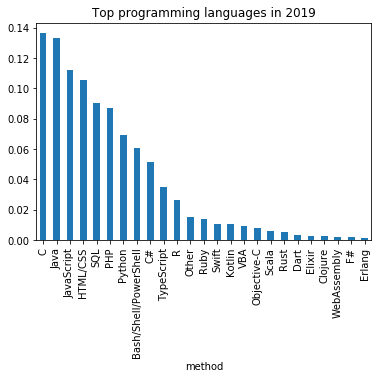

                          count
method                         
C                      0.136588
Java                   0.133031
JavaScript             0.112361
HTML/CSS               0.105240
SQL                    0.090209
PHP                    0.087393
Python                 0.069146
Bash/Shell/PowerShell  0.060699
C#                     0.051413
TypeScript             0.035145
R                      0.026463
Other                  0.015027
Ruby                   0.013910
Swift                  0.010899
Kotlin                 0.010663
VBA                    0.009071
Objective-C            0.007952
Scala                  0.006278
Rust                   0.005301
Dart                   0.003193
Elixir                 0.002391
Clojure                0.002379
WebAssembly            0.001926
F#                     0.001846
Erlang                 0.001474


In [111]:
import HowToBreakIntoTheField as t # Thias file from udacity course of data scientist
possible_vals = ["Bash/Shell/PowerShell", "C","C++" 
                 "JavaScript", "PHP", "SQL",
                 "C#","Clojure", "Dart", "Elixir",
                 "Erlang", "F#","GO","HTML/CSS","Java","JavaScript","Kotlin","Objective-C",
                 "PHP", "Python", "R","Ruby","Rust","Scala","Swift","TypeScript","VBA",
                 "WebAssembly","Other"]

#def clean_and_plot(df, title='Top programming languages in 2019', plot=True):
title='Top programming languages in 2019'
    
ProgrammingL = df['LanguageWorkedWith'].value_counts().reset_index()
ProgrammingL.rename(columns={'index': 'method', 'LanguageWorkedWith': 'count'}, inplace=True)

props_df = clean_and_plot(ProgrammingL,possible_vals,title)

According to the answwrs of the suervy : C and Java are the top used languages

# Step4: 
## Answer the second quesiotn : How the user rate the efficiency of using StackOverflow according to the time it takes to solve their problem?
To Answer this question I look to the answer of :
Think back to the last time you solved a coding problem using Stack Overflow, as well as the last time you solved a problem using a different resource. Which was faster?
Which is stored on SOTimeSaved column

In [54]:
StackOFE= Cleaned_data.sort_values(by=['SOTimeSaved']).mean

Stack Overflow was much faster            47869
Stack Overflow was slightly faster        21342
They were about the same                  17029
The other resource was slightly faster     1670
The other resource was much faster          973
Name: SOTimeSaved, dtype: int64


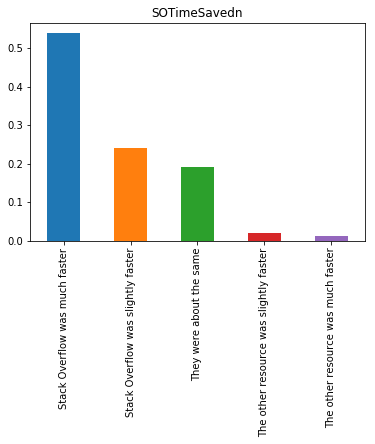

In [57]:
efficiency = Cleaned_data.SOTimeSaved.value_counts() #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(efficiency/Cleaned_data.shape[0]).plot(kind="bar");
plt.title("SOTimeSavedn");
print (efficiency)

In [58]:
print (efficiency/Cleaned_data.shape[0])

Stack Overflow was much faster            0.538562
Stack Overflow was slightly faster        0.240113
They were about the same                  0.191589
The other resource was slightly faster    0.018789
The other resource was much faster        0.010947
Name: SOTimeSaved, dtype: float64


From the previous chart and values we can do that more than 70% of the user find Stack overflow faster than other platform either much faster  or slightly faster

# Step 5: 
## According to the responses of the survey what are the greatest challenges to productivity as of developer?

In [95]:
#WorkChallenge
#First explor the data in the column: WorkChallenge
Challenges=Cleaned_data['WorkChallenge'].value_counts().reset_index()
Challenges.head()

,index,WorkChallenge
0,Being tasked with non-development work;Distrac...,23060
1,Being tasked with non-development work;Meeting...,1741
2,Being tasked with non-development work;Distrac...,1511
3,Distracting work environment;Meetings;Not enou...,1472
4,Not enough people for the workload,1420


In [114]:
#We need to break the answers of each respose, becuase each respose consists of one or more answers
#Let's Change the name of the column to methos: 
Challenges.rename(columns={'index': 'method', 'Challenges': 'count'},inplace=True)

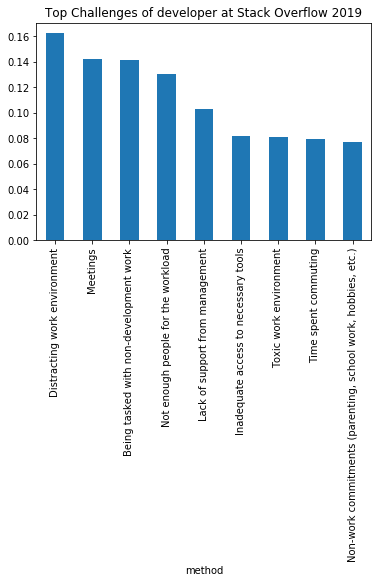

                                                       count
method                                                      
Distracting work environment                        0.162459
Meetings                                            0.142330
Being tasked with non-development work              0.141674
Not enough people for the workload                  0.130521
Lack of support from management                     0.103265
Inadequate access to necessary tools                0.082008
Toxic work environment                              0.080770
Time spent commuting                                0.079732
Non-work commitments (parenting, school work, h...  0.077241


In [125]:
possible_vals = ["Distracting work environment", "Being tasked with non-development work",
                 "Meetings", "Time spent commuting", "Not enough people for the workload",
            
                 "Toxic work environment",
                 "Inadequate access to necessary tools","Lack of support from management",
                 "Non-work commitments (parenting, school work, hobbies, etc.)"]

#def clean_and_plot(df, title='Top Challenges 2019', plot=True):
title='Top Challenges of developer at Stack Overflow 2019'
    
Challenges = df['WorkChallenge'].value_counts().reset_index()
Challenges.rename(columns={'index': 'method', 'WorkChallenge': 'count'}, inplace=True)

props_df = clean_and_plot(Challenges,possible_vals,title)

## The answer is Distracting work environment 

Rfreances:
- https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html